<a href="https://colab.research.google.com/github/146790g/MNIST_2CNN/blob/master/MNIST_2CNN_model_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Double Layer CNN Model FIT

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

This notebook uses TensorFlow2.x.

In [ ]:
%tensorflow_version 2.x

####[CNN-01]
Import modules and set a random seed.

In [ ]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist

np.random.seed(20190213)
tf.random.set_seed(20190213)

####[CNN-02]
Download the MNIST dataset and store into NumPy arrays.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(test_images)
print(test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


####[CNN-03]
Define a CNN model with a single convolutional filter layer.

In [ ]:
model = models.Sequential()
model.add(layers.Reshape((28, 28, 1), input_shape=(28*28,), name='reshape'))
model.add(layers.Conv2D(32, (5, 5), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter1'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling1'))
model.add(layers.Conv2D(64, (5, 5), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling2'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(1024, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dropout(rate=0.5, name='dropout'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv_filter1 (Conv2D)        (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 14, 14, 32)        0         
_________________________________________________________________
conv_filter2 (Conv2D)        (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
hidden (Dense)               (None, 1024)              3

####[CNN-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

####[CNN-05]
Train the model. It achieves the 99.3% accuracy.

In [ ]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 7s 15ms/step - loss: 0.1566 - acc: 0.9516 - val_loss: 0.0395 - val_acc: 0.9873
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0454 - acc: 0.9858 - val_loss: 0.0331 - val_acc: 0.9891
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0318 - acc: 0.9899 - val_loss: 0.0242 - val_acc: 0.9923
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0245 - acc: 0.9924 - val_loss: 0.0255 - val_acc: 0.9914
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0208 - acc: 0.9934 - val_loss: 0.0207 - val_acc: 0.9926
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0158 - acc: 0.9947 - val_loss: 0.0266 - val_acc: 0.9908
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0131 - acc: 0.9958 - val_loss: 0.0225 - val_acc: 0.9921
Epoch 8/10
469/469 [==============================] - 7s 14ms/step - 

####[CNN-06]
Plot chars for accuracy and loss values.

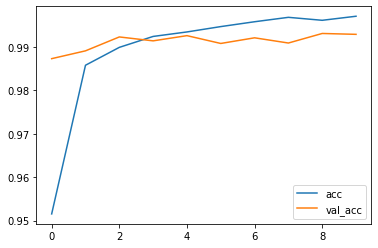

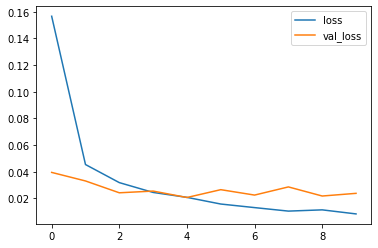

In [ ]:
DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot()
DataFrame({'loss': history.history['loss'], 
           'val_loss': history.history['val_loss']}).plot()

####[CNN-07]
Mount your Google Drive on `/content/gdrive`.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


####[MDF-08]
Export the trained model as a file `MNIST_double.h5` on your Google Drive.

In [ ]:
result_dir = '/content/gdrive/My Drive/Colab Notebooks/MNIST/results'  
import os

# model save
model.save(os.path.join(result_dir,'MNIST_double_CNN.h5'))
